# Section: Solving the game (examples)

In [50]:
>>> import ambulance_game as abg
>>> import matplotlib.pyplot as plt
>>> import nashpy as nash
>>> import numpy as np

In [32]:
>>> lambda_1_A = 1
>>> mu_A = 2
>>> num_of_servers_A = 1
>>> system_capacity_A = 2
>>> buffer_capacity_A = 2

>>> lambda_1_B = 1
>>> mu_B = 3
>>> num_of_servers_B = 1
>>> system_capacity_B = 2
>>> buffer_capacity_B = 2

>>> lambda_2 = 1
>>> target = 1
>>> alpha = 0.5
>>> p_hat = 0.8

In [33]:
>>> A, B, R = abg.game.get_payoff_matrices(
...     lambda_2=lambda_2,
...     lambda_1_1=lambda_1_A,
...     lambda_1_2=lambda_1_B,
...     mu_1=mu_A,
...     mu_2=mu_B,
...     num_of_servers_1=num_of_servers_A,
...     num_of_servers_2=num_of_servers_B,
...     system_capacity_1=system_capacity_A,
...     system_capacity_2=system_capacity_B,
...     buffer_capacity_1=buffer_capacity_A,
...     buffer_capacity_2=buffer_capacity_B,
...     target=target,
...     alpha=alpha,
...     p_hat=p_hat,
... )

In [34]:
game = nash.Game(A, B)
game

Bi matrix game with payoff matrices:

Row player:
[[0.99934675 0.99934675]
 [0.99282972 0.99828249]]

Column player:
[[0.98725977 0.99408002]
 [0.98725977 0.99312791]]

# Nash Equilibrium

In [35]:
tuple(game.support_enumeration())

((array([1., 0.]), array([0., 1.])),)

In [36]:
game.lemke_howson(initial_dropped_label=0)

(array([1., 0.]), array([0., 1.]))

# Fictitious play

In [37]:
np.random.seed(5)
play_counts = tuple(game.fictitious_play(iterations=100))
play_counts[-1]

[array([99.,  1.]), array([ 1., 99.])]

C:\Users\c1400990\AppData\Local\Temp\ipykernel_9996\1492114823.py:3: RuntimeWarning: invalid value encountered in true_divide
  row_play_counts / np.sum(row_play_counts)


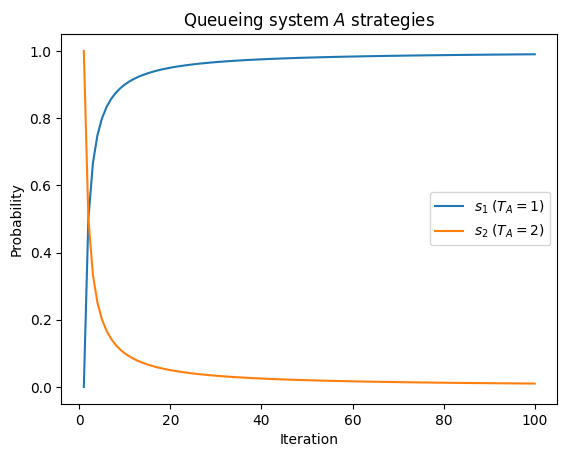

In [38]:
plt.figure() 
probabilities = [
    row_play_counts / np.sum(row_play_counts)
    for row_play_counts, col_play_counts in play_counts
]
for number, strategy in enumerate(zip(*probabilities)):
    plt.plot(strategy, label=f"$s_{number + 1} \; (T_A = {number + 1})$")  
plt.xlabel("Iteration")  
plt.ylabel("Probability")  
plt.title("Queueing system $A$ strategies")  
plt.legend()
plt.savefig("fictitious_play_A.pdf", dpi=200)

C:\Users\c1400990\AppData\Local\Temp\ipykernel_9996\3598623438.py:3: RuntimeWarning: invalid value encountered in true_divide
  col_play_counts / np.sum(col_play_counts)


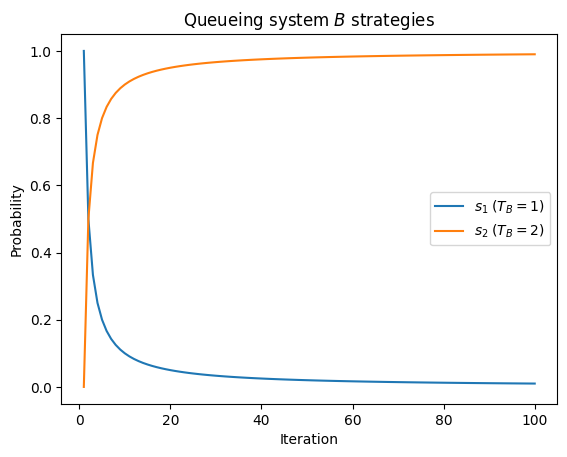

In [39]:
plt.figure() 
probabilities = [
    col_play_counts / np.sum(col_play_counts)
    for row_play_counts, col_play_counts in play_counts
]
for number, strategy in enumerate(zip(*probabilities)):
    plt.plot(strategy, label=f"$s_{number + 1} \; (T_B = {number + 1})$")  
plt.xlabel("Iteration")  
plt.ylabel("Probability")  
plt.title("Queueing system $B$ strategies")
plt.legend()
plt.savefig("fictitious_play_B.pdf", dpi=200)

# Stochastic fictitious play

In [49]:
np.random.seed(0)
play_counts_and_distributions = tuple(game.stochastic_fictitious_play(
    iterations=1000,
))
play_counts_and_distributions[-1]

([array([509., 491.]), array([512., 488.])],
 [array([0.51785058, 0.48214942]), array([0.47022964, 0.52977036])])

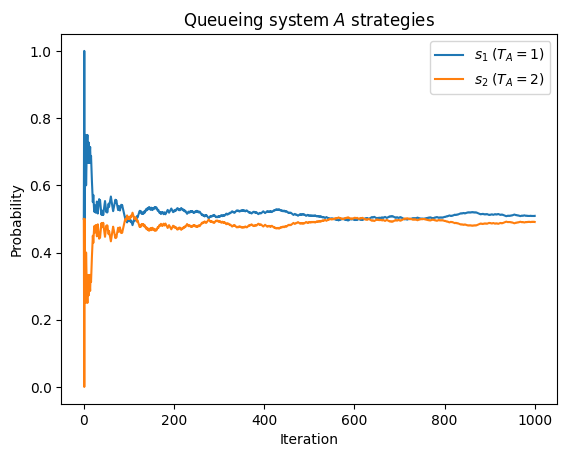

In [41]:
plt.figure() 
probabilities = [
    row_play_counts / np.sum(row_play_counts)
    if np.sum(row_play_counts) != 0
    else row_play_counts + 1 / len(row_play_counts)
    for (row_play_counts, col_play_counts), _ in play_counts_and_distributions]
for number, strategy in enumerate(zip(*probabilities)):
    plt.plot(strategy, label=f"$s_{number + 1} \; (T_A = {number + 1})$") 
plt.xlabel("Iteration") 
plt.ylabel("Probability") 
plt.title("Queueing system $A$ strategies")
plt.legend()
plt.savefig("stochastic_fictitious_play_A.pdf", dpi=200)

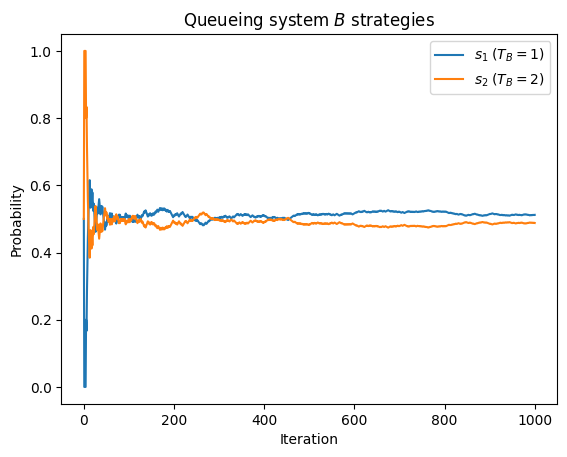

In [42]:
plt.figure() 
probabilities = [
    col_play_counts / np.sum(col_play_counts)
    if np.sum(col_play_counts) != 0
    else col_play_counts + 1 / len(col_play_counts)
    for (row_play_counts, col_play_counts), _ in play_counts_and_distributions]
for number, strategy in enumerate(zip(*probabilities)):
    plt.plot(strategy, label=f"$s_{number + 1} \; (T_B = {number + 1})$") 
plt.xlabel("Iteration") 
plt.ylabel("Probability") 
plt.title("Queueing system $B$ strategies")
plt.legend()
plt.savefig("stochastic_fictitious_play_B.pdf", dpi=200)

# Asymmetric replicator dynamics

In [43]:
xs, ys = game.asymmetric_replicator_dynamics(timepoints=np.linspace(0, 10000, 100))
np.round(xs[-1], 4), np.round(ys[-1], 4)

(array([1., 0.]), array([0., 1.]))

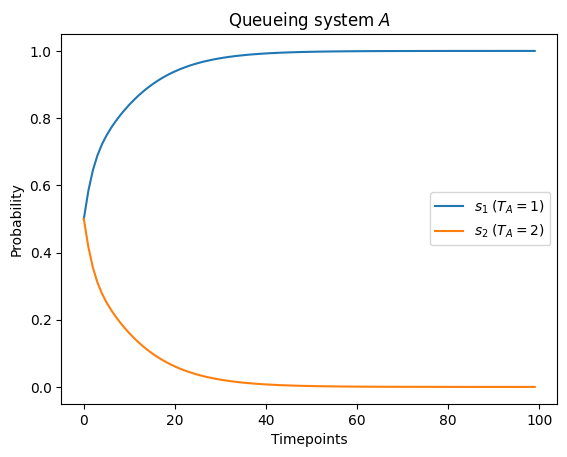

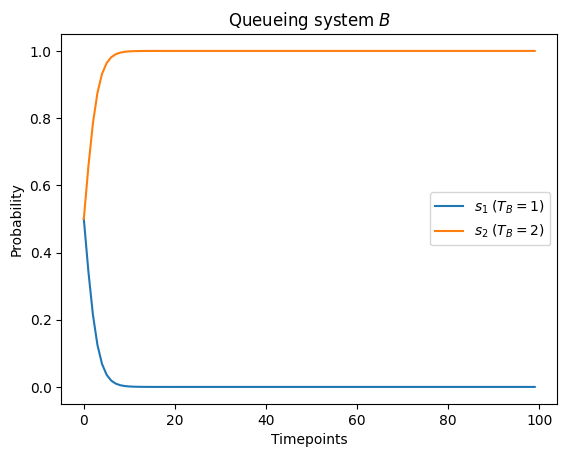

In [45]:
plt.plot(xs)
plt.xlabel("Timepoints")
plt.ylabel("Probability")
plt.title("Queueing system $A$")
plt.legend(["$s_1 \; (T_A = 1)$", "$s_2 \; (T_A = 2)$"])
plt.savefig("asymmetric_replicator_dynamics_A.pdf", dpi=200)
plt.show();

plt.plot(ys)
plt.xlabel("Timepoints")
plt.ylabel("Probability")
plt.title("Queueing system $B$")
plt.legend(["$s_1 \; (T_B = 1)$", "$s_2 \; (T_B = 2)$"])
plt.savefig("asymmetric_replicator_dynamics_B.pdf", dpi=200)
plt.show();